# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 572


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"
# Define an empty list to fetch the weather data for each city
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url+f"&q={city}"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    # pause to avoid rate limiting
    time.sleep(1)
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | luderitz
Processing Record 2 of Set 1 | pithora
Processing Record 3 of Set 1 | puerto aysen
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | masterton
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | tofol
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | kondopoga
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | kourou
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | petropavlovsk-kamchatsky
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | malango
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | margaret river
Processing Record 21 of Set 1 | ust-nera
Processing Record 22 of Set

In [17]:
url1 = f"https://api.openweathermap.org/data/2.5/weather?appid={"c044b956eff4097fcaf584ca37c13b1f"}"
city1="whitehorse"
city_url1 = url1+f"&q={city1}"
city_weather1 = requests.get(city_url1).json()
city_weather1

{'coord': {'lon': -135.0538, 'lat': 60.7161},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 276.33,
  'feels_like': 272.41,
  'temp_min': 276.1,
  'temp_max': 276.58,
  'pressure': 1013,
  'humidity': 81,
  'sea_level': 1013,
  'grnd_level': 937},
 'visibility': 10000,
 'wind': {'speed': 4.63, 'deg': 170, 'gust': 8.23},
 'clouds': {'all': 100},
 'dt': 1728586741,
 'sys': {'type': 2,
  'id': 47668,
  'country': 'CA',
  'sunrise': 1728574204,
  'sunset': 1728612220},
 'timezone': -25200,
 'id': 6180550,
 'name': 'Whitehorse',
 'cod': 200}

In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [20]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,luderitz,-26.6481,15.1594,288.78,70,0,4.77,NA,1728585955
1,pithora,21.2667,82.5167,297.32,84,29,0.37,IN,1728585956
2,puerto aysen,-45.4000,-72.7000,283.41,72,100,2.78,CL,1728585957
3,puerto natales,-51.7236,-72.4875,282.40,61,75,11.83,CL,1728585958
4,masterton,-40.9597,175.6575,279.01,86,2,1.67,NZ,1728585959
5,hermanus,-34.4187,19.2345,285.82,79,96,4.90,ZA,1728585960
6,tofol,5.3248,163.0078,301.60,72,37,4.17,FM,1728585961
7,yellowknife,62.4560,-114.3525,277.82,100,75,2.57,CA,1728585957
8,kondopoga,62.2057,34.2614,278.88,92,100,5.62,RU,1728585964
9,bethel,41.3712,-73.4140,289.38,47,0,4.12,US,1728585965


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,luderitz,-26.6481,15.1594,288.78,70,0,4.77,NaN,1728585955
1,pithora,21.2667,82.5167,297.32,84,29,0.37,IN,1728585956
2,puerto aysen,-45.4000,-72.7000,283.41,72,100,2.78,CL,1728585957
3,puerto natales,-51.7236,-72.4875,282.40,61,75,11.83,CL,1728585958
4,masterton,-40.9597,175.6575,279.01,86,2,1.67,NZ,1728585959


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

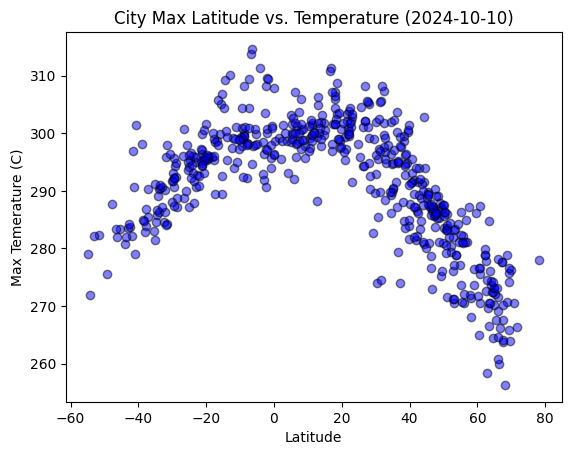

In [77]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],marker='o',alpha=.5,c='blue',edgecolors ='black')
# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2024-10-10)')
plt.xlabel('Latitude')
plt.ylabel('Max Temerature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

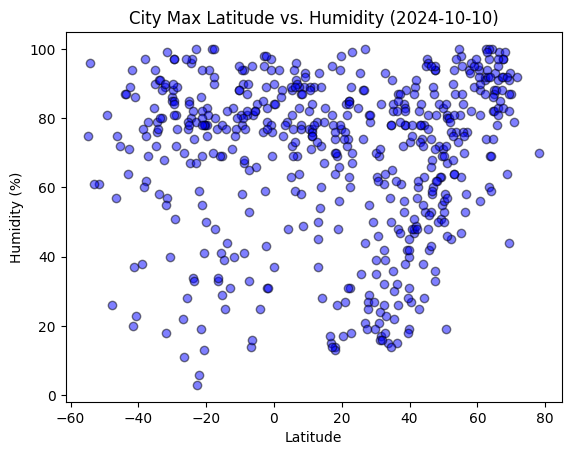

In [78]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],marker='o',alpha=.5,c='blue',edgecolors ='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity (2024-10-10)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

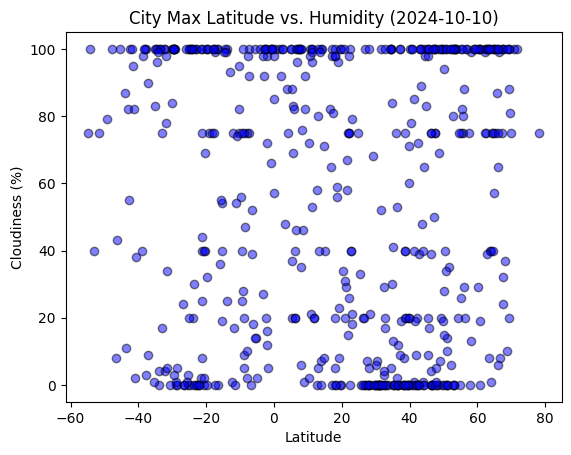

In [79]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],marker='o',alpha=.5,c='blue',edgecolors ='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity (2024-10-10)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

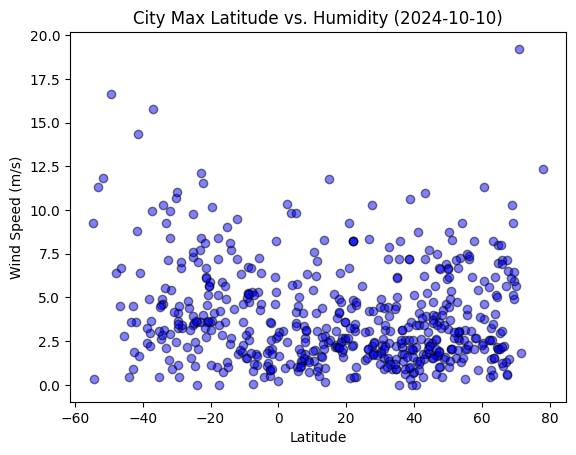

In [80]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],marker='o',alpha=.5,c='blue',edgecolors ='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity (2024-10-10)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df['Lat'] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,pithora,21.2667,82.5167,297.32,84,29,0.37,IN,1728585956
6,tofol,5.3248,163.0078,301.60,72,37,4.17,FM,1728585961
7,yellowknife,62.4560,-114.3525,277.82,100,75,2.57,CA,1728585957
8,kondopoga,62.2057,34.2614,278.88,92,100,5.62,RU,1728585964
9,bethel,41.3712,-73.4140,289.38,47,0,4.12,US,1728585965


In [66]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,luderitz,-26.6481,15.1594,288.78,70,0,4.77,NaN,1728585955
2,puerto aysen,-45.4000,-72.7000,283.41,72,100,2.78,CL,1728585957
3,puerto natales,-51.7236,-72.4875,282.40,61,75,11.83,CL,1728585958
4,masterton,-40.9597,175.6575,279.01,86,2,1.67,NZ,1728585959
5,hermanus,-34.4187,19.2345,285.82,79,96,4.90,ZA,1728585960


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7095740340419593


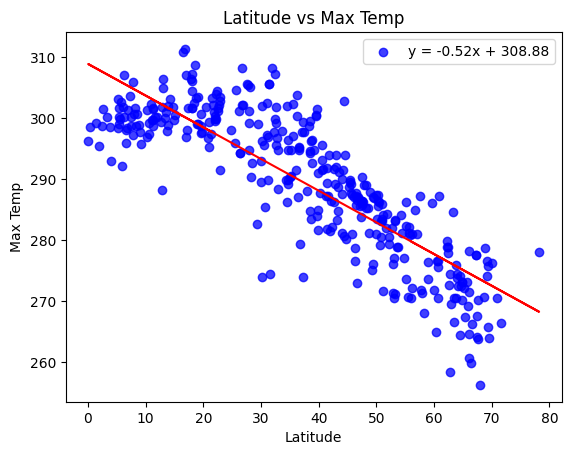

In [81]:
# Linear regression on Northern Hemisphere
nlat = northern_hemi_df['Lat']
ntemp = northern_hemi_df['Max Temp'] 

north_correlation_coefficient = np.corrcoef(nlat,ntemp)[0, 1]
north_correlation_coefficient = round(north_correlation_coefficient,2)

slope, intercept, r_value, p_value, std_err = st.linregress(nlat, ntemp)
line = slope * nlat + intercept
r_squared = r_value**2

north_legend_equation = f'y = {round(slope, 2)}x + {round(intercept, 2)}'


plt.scatter(nlat,ntemp,alpha=.75,c='blue')
plt.plot(nlat,line,color='red',label='Fitted Line')
plt.title('Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f'The r^2-value is: {r_squared}')

plt.legend([north_legend_equation])
plt.show()


The r^2-value is: 0.5803666432319884


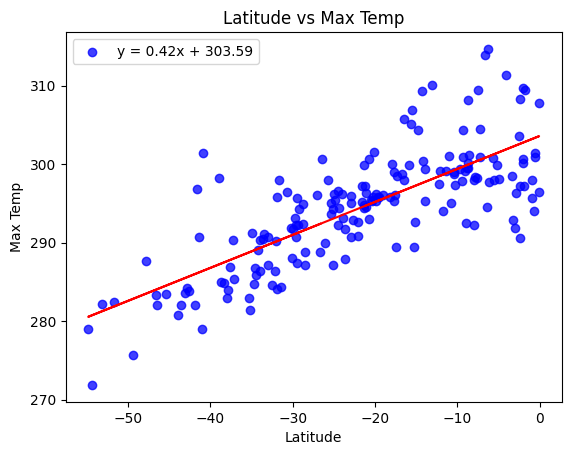

In [82]:
# Linear regression on Southern Hemisphere
slat = southern_hemi_df['Lat']
stemp = southern_hemi_df['Max Temp'] 

south_correlation_coefficient = np.corrcoef(slat,stemp)[0, 1]
south_correlation_coefficient = round(south_correlation_coefficient,2)

s_slope, s_intercept, s_r_value, s_p_value, s_std_err = st.linregress(slat, stemp)
s_line = s_slope * slat + s_intercept
s_r_squared = s_r_value**2

south_legend_equation = f'y = {round(s_slope, 2)}x + {round(s_intercept, 2)}'


plt.scatter(slat,stemp,alpha=.75,c='blue')
plt.plot(slat,s_line,color='red',label='Fitted Line')
plt.title('Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f'The r^2-value is: {s_r_squared}')

plt.legend([south_legend_equation])
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.031733840504964334


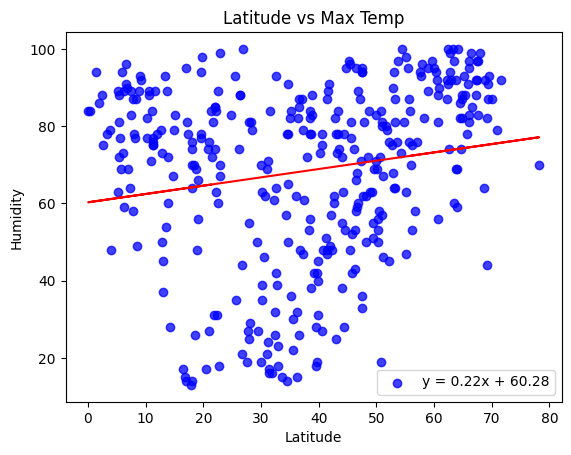

In [83]:
# Northern Hemisphere
n_humid_lat = northern_hemi_df['Lat']
n_humid_temp = northern_hemi_df['Humidity'] 

n_humnid_correlation_coefficient = np.corrcoef(n_humid_lat,n_humid_temp)[0, 1]
n_humnid_correlation_coefficient = round(south_correlation_coefficient,2)

n_humid_slope, n_humid_intercept, n_humid_r_value, n_humid_p_value, n_humid_std_err = st.linregress(n_humid_lat, n_humid_temp)
n_humid_line = n_humid_slope * n_humid_lat + n_humid_intercept
n_humid_r_squared = n_humid_r_value**2

n_humid_legend_equation = f'y = {round(n_humid_slope, 2)}x + {round(n_humid_intercept, 2)}'


plt.scatter(n_humid_lat,n_humid_temp,alpha=.75,c='blue')
plt.plot(n_humid_lat,n_humid_line,color='red',label='Fitted Line')
plt.title('Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r^2-value is: {n_humid_r_squared}')

plt.legend([n_humid_legend_equation])
plt.show()

The r^2-value is: 0.0001291471208449759


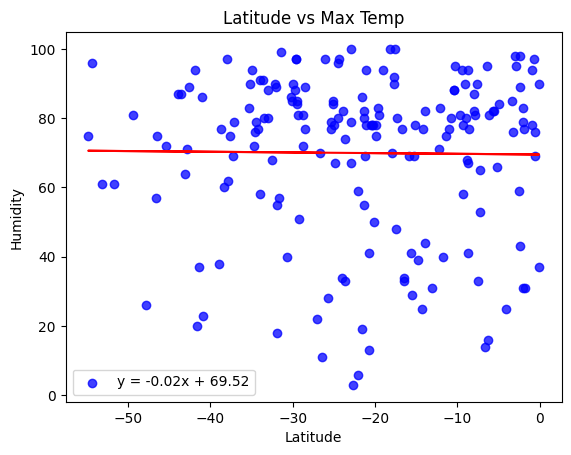

In [84]:
# Southern Hemisphere
s_humid_lat = southern_hemi_df['Lat']
s_humid_temp = southern_hemi_df['Humidity'] 

n_humnid_correlation_coefficient = np.corrcoef(s_humid_lat,s_humid_temp)[0, 1]
n_humnid_correlation_coefficient = round(south_correlation_coefficient,2)

s_humid_slope, s_humid_intercept, s_humid_r_value, s_humid_p_value, s_humid_std_err = st.linregress(s_humid_lat, s_humid_temp)
s_humid_line = s_humid_slope * s_humid_lat + s_humid_intercept
s_humid_r_squared = s_humid_r_value**2

s_humid_legend_equation = f'y = {round(s_humid_slope, 2)}x + {round(s_humid_intercept, 2)}'


plt.scatter(s_humid_lat,s_humid_temp,alpha=.75,c='blue')
plt.plot(s_humid_lat,s_humid_line,color='red',label='Fitted Line')
plt.title('Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r^2-value is: {s_humid_r_squared}')

plt.legend([s_humid_legend_equation])
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.0048588489868472235


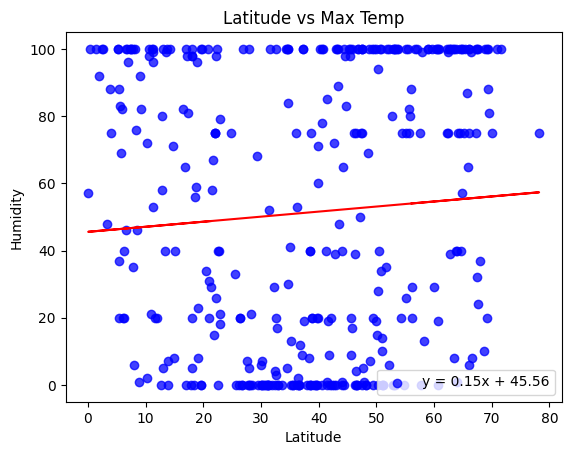

In [85]:
# Northern Hemisphere
n_cloud_lat = northern_hemi_df['Lat']
n_cloud_temp = northern_hemi_df['Cloudiness'] 

n_humnid_correlation_coefficient = np.corrcoef(n_cloud_lat,n_cloud_temp)[0, 1]
n_humnid_correlation_coefficient = round(south_correlation_coefficient,2)

n_cloud_slope, n_cloud_intercept, n_cloud_r_value, n_cloud_p_value, n_cloud_std_err = st.linregress(n_cloud_lat, n_cloud_temp)
n_cloud_line = n_cloud_slope * n_cloud_lat + n_cloud_intercept
n_cloud_r_squared = n_cloud_r_value**2

n_cloud_legend_equation = f'y = {round(n_cloud_slope, 2)}x + {round(n_cloud_intercept, 2)}'


plt.scatter(n_cloud_lat,n_cloud_temp,alpha=.75,c='blue')
plt.plot(n_cloud_lat,n_cloud_line,color='red',label='Fitted Line')
plt.title('Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r^2-value is: {n_cloud_r_squared}')

plt.legend([n_cloud_legend_equation])
plt.show()

The r^2-value is: 0.0048588489868472235


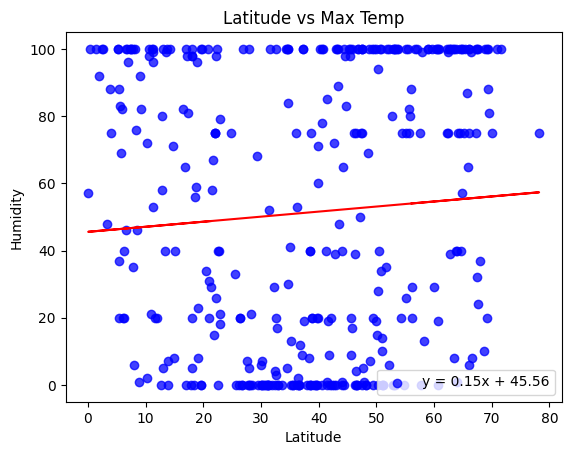

In [86]:
# Southern Hemisphere
s_cloud_lat = northern_hemi_df['Lat']
s_cloud_temp = northern_hemi_df['Cloudiness'] 

n_humnid_correlation_coefficient = np.corrcoef(s_cloud_lat,s_cloud_temp)[0, 1]
n_humnid_correlation_coefficient = round(south_correlation_coefficient,2)

s_cloud_slope, s_cloud_intercept, s_cloud_r_value, s_cloud_p_value, s_cloud_std_err = st.linregress(s_cloud_lat, s_cloud_temp)
s_cloud_line = s_cloud_slope * s_cloud_lat + s_cloud_intercept
s_cloud_r_squared = s_cloud_r_value**2

s_cloud_legend_equation = f'y = {round(s_cloud_slope, 2)}x + {round(s_cloud_intercept, 2)}'


plt.scatter(s_cloud_lat,s_cloud_temp,alpha=.75,c='blue')
plt.plot(s_cloud_lat,s_cloud_line,color='red',label='Fitted Line')
plt.title('Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r^2-value is: {s_cloud_r_squared}')

plt.legend([s_cloud_legend_equation])
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.020162269072727668


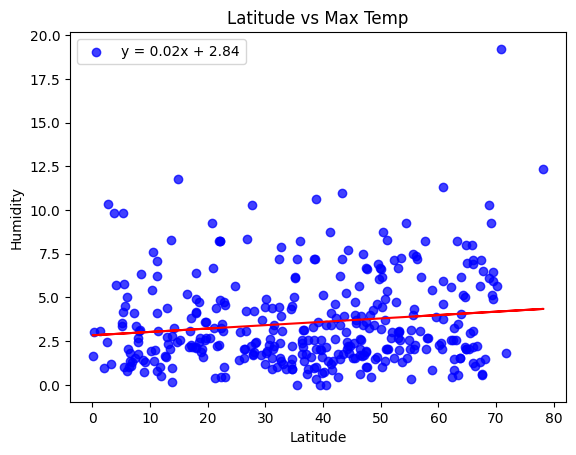

In [87]:
# Northern Hemisphere
n_wind_lat = northern_hemi_df['Lat']
n_wind_temp = northern_hemi_df['Wind Speed'] 

n_humnid_correlation_coefficient = np.corrcoef(n_wind_lat,n_wind_temp)[0, 1]
n_humnid_correlation_coefficient = round(south_correlation_coefficient,2)

n_wind_slope, n_wind_intercept, n_wind_r_value, n_wind_p_value, n_wind_std_err = st.linregress(n_wind_lat, n_wind_temp)
n_wind_line = n_wind_slope * n_wind_lat + n_wind_intercept
n_wind_r_squared = n_wind_r_value**2

n_wind_legend_equation = f'y = {round(n_wind_slope, 2)}x + {round(n_wind_intercept, 2)}'


plt.scatter(n_wind_lat,n_wind_temp,alpha=.75,c='blue')
plt.plot(n_wind_lat,n_wind_line,color='red',label='Fitted Line')
plt.title('Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r^2-value is: {n_wind_r_squared}')

plt.legend([n_wind_legend_equation])
plt.show()

The r^2-value is: 0.020162269072727668


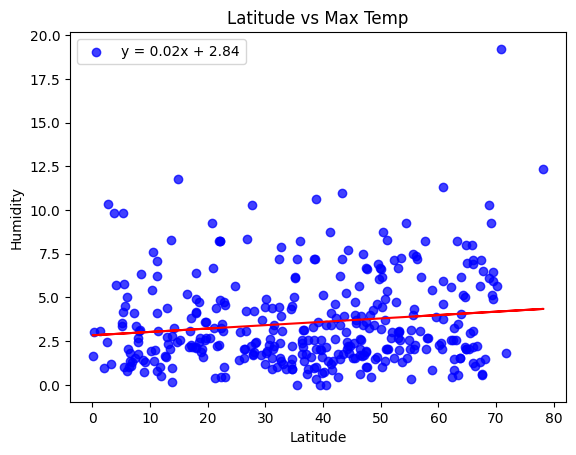

In [88]:
# Southern Hemisphere
s_wind_lat = northern_hemi_df['Lat']
s_wind_temp = northern_hemi_df['Wind Speed'] 

n_humnid_correlation_coefficient = np.corrcoef(s_wind_lat,s_wind_temp)[0, 1]
n_humnid_correlation_coefficient = round(south_correlation_coefficient,2)

s_wind_slope, s_wind_intercept, s_wind_r_value, s_wind_p_value, s_wind_std_err = st.linregress(s_wind_lat, s_wind_temp)
s_wind_line = s_wind_slope * s_wind_lat + s_wind_intercept
s_wind_r_squared = s_wind_r_value**2

s_wind_legend_equation = f'y = {round(s_wind_slope, 2)}x + {round(s_wind_intercept, 2)}'


plt.scatter(s_wind_lat,s_wind_temp,alpha=.75,c='blue')
plt.plot(s_wind_lat,s_wind_line,color='red',label='Fitted Line')
plt.title('Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r^2-value is: {s_wind_r_squared}')

plt.legend([s_wind_legend_equation])
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE